In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,722 cases (7 day average) as of Tue 04 May, +58.0 since Mon 03 May
85 hospitalised (7 day average) as of Wed 05 May, +0.0 since Wed 05 May
9 died (7 day average) as of Tue 04 May, +0.0 since Mon 03 May


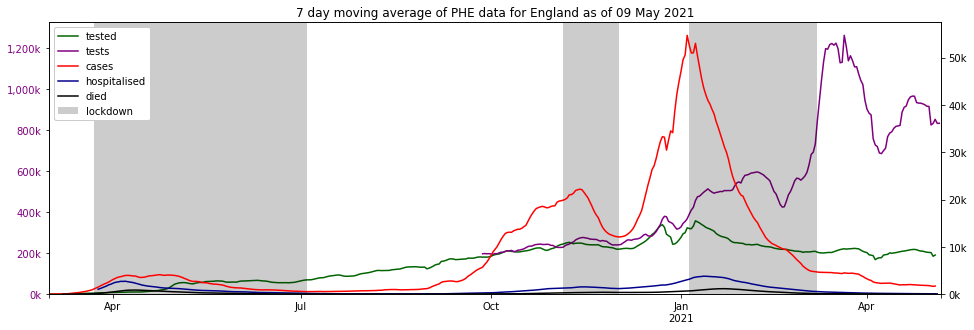

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

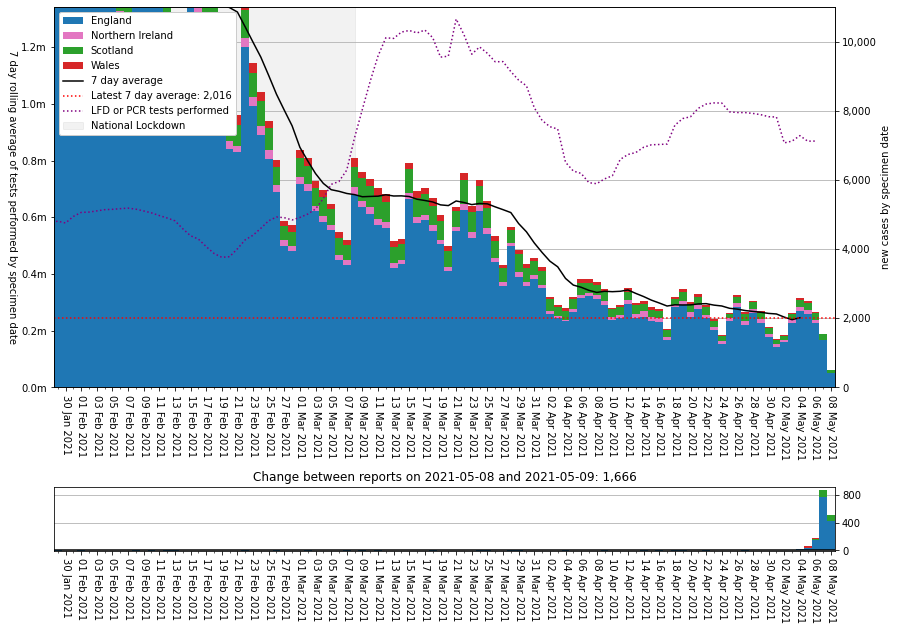

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

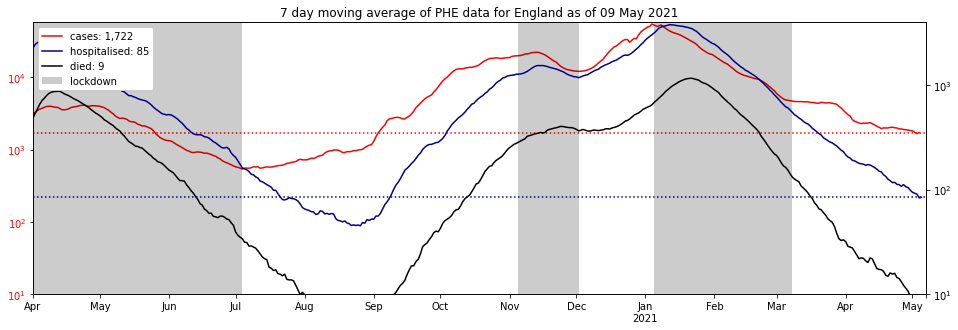

In [5]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

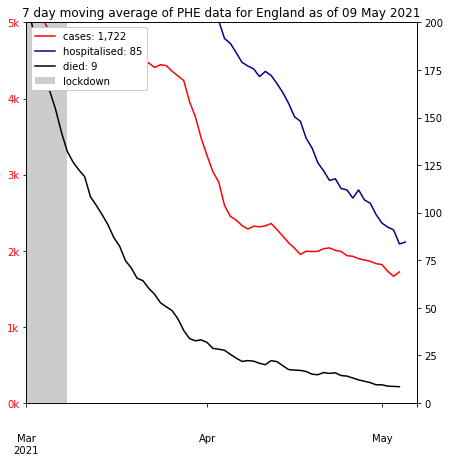

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,14871208.0,29578216.0,14707008.0,56286961,26.420343,26.128623,47.451034
1,Northern Ireland,N92000002,487828.0,972597.0,484769.0,1893667,25.761023,25.599485,48.639492
2,Scotland,S92000003,1468296.0,2897975.0,1429679.0,5463300,26.875625,26.168781,46.955595
3,Wales,W92000004,842047.0,1922881.0,1080834.0,3152879,26.707241,34.280859,39.011900


'partial: 35,371,669 (53.0%), full: 17,669,379'

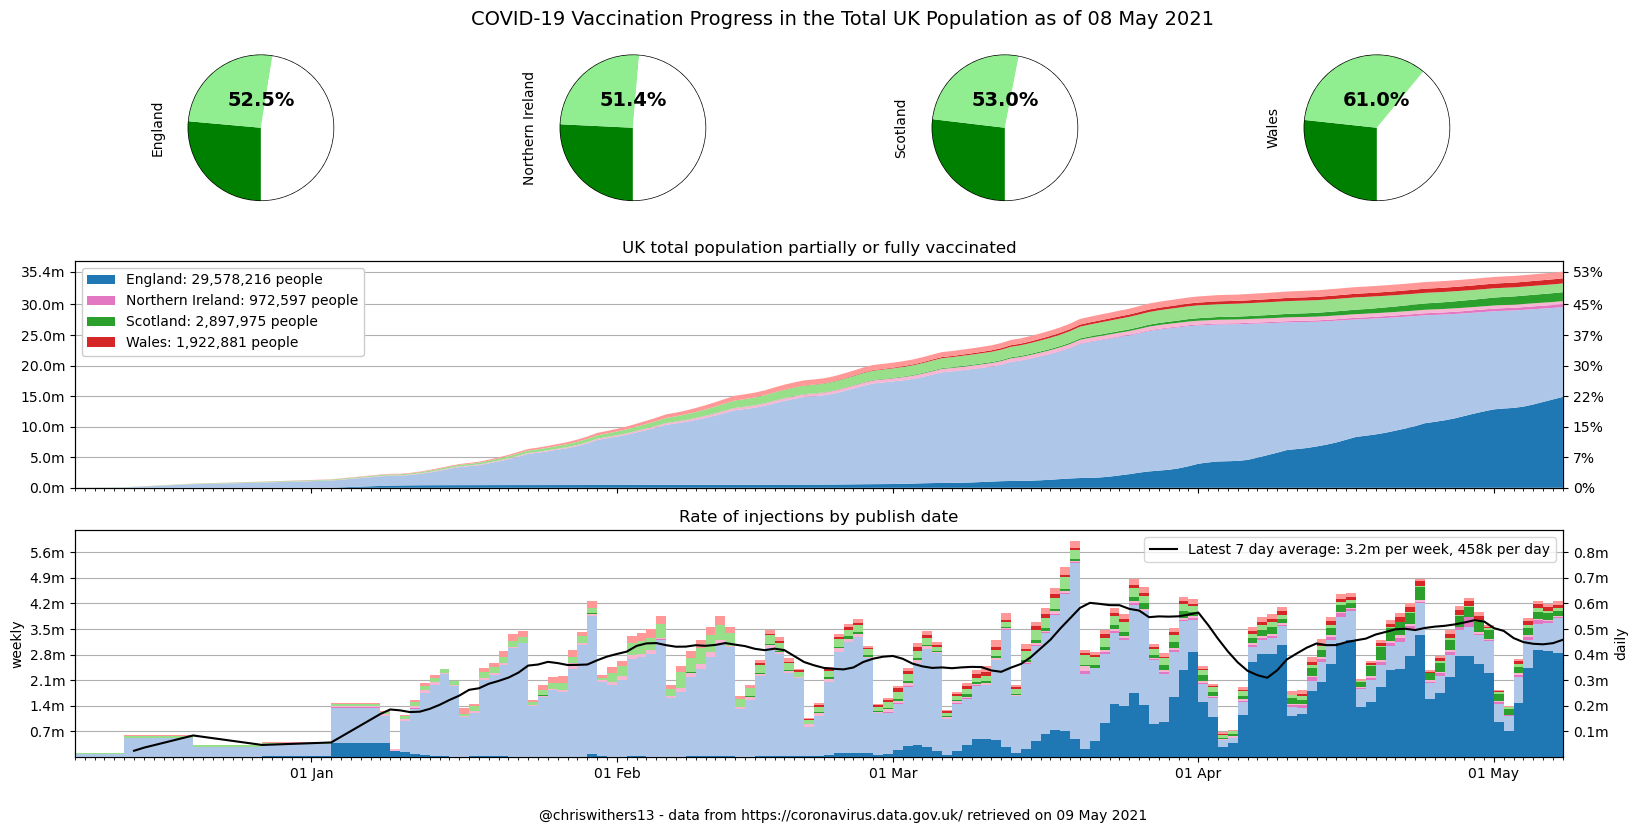

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

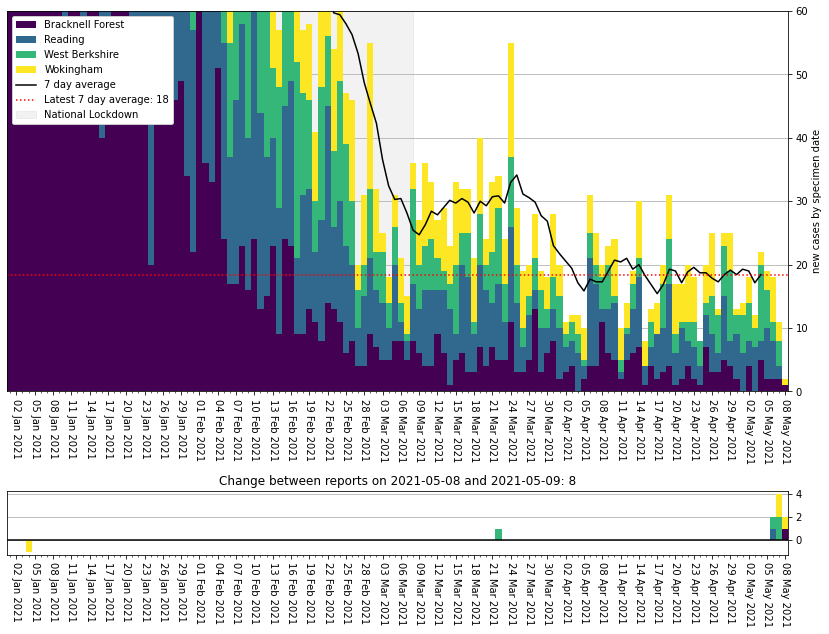

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

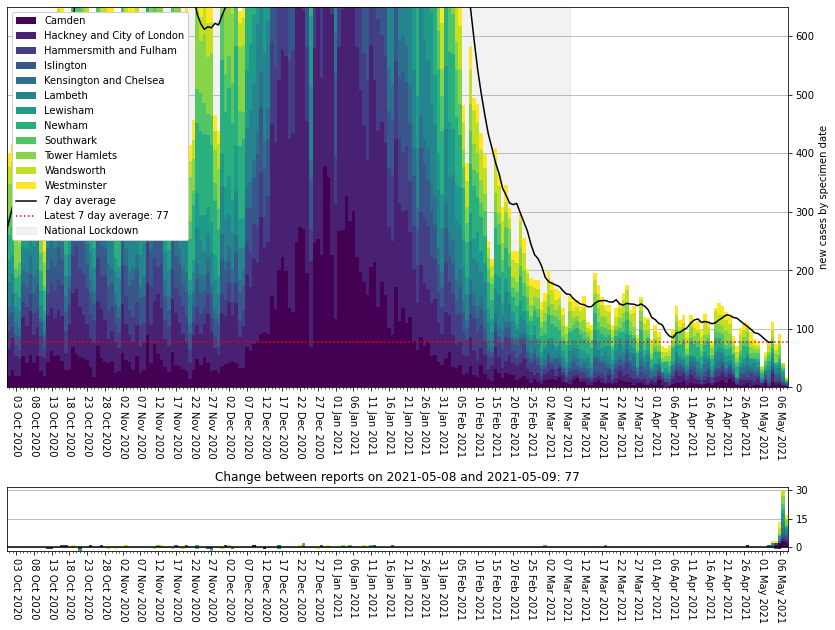

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E07000036,Erewash,195.023013,225.0,2021-05-08
E08000001,Bolton,136.671883,393.0,2021-05-08
S12000020,Moray,86.620747,83.0,2021-05-08
E06000008,Blackburn with Darwen,82.834545,124.0,2021-05-08
E06000055,Bedford,62.899615,109.0,2021-05-08
N09000005,Derry City and Strabane,58.829751,89.0,2021-05-08
E07000169,Selby,57.382476,52.0,2021-05-08
S12000049,Glasgow City,48.647966,308.0,2021-05-08
E08000014,Sefton,48.116928,133.0,2021-05-08


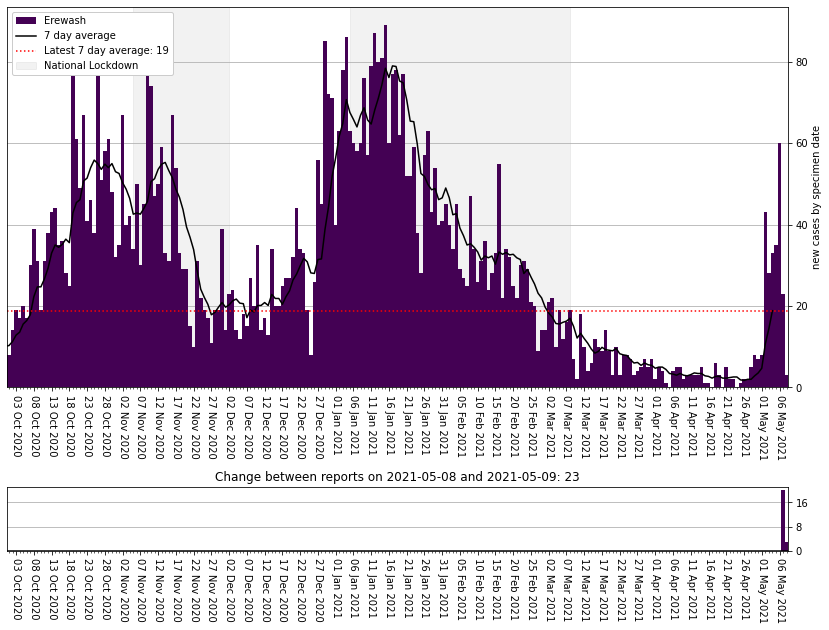

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000001,Bolton,136.671883,393.0,2021-05-08
E08000035,Leeds,43.119806,342.0,2021-05-08
S12000049,Glasgow City,48.647966,308.0,2021-05-08
E08000019,Sheffield,41.890868,245.0,2021-05-08
E07000036,Erewash,195.023013,225.0,2021-05-08
E08000034,Kirklees,47.750388,210.0,2021-05-08
E08000032,Bradford,37.793455,204.0,2021-05-08
E08000003,Manchester,34.366872,190.0,2021-05-08
E08000025,Birmingham,15.589202,178.0,2021-05-08


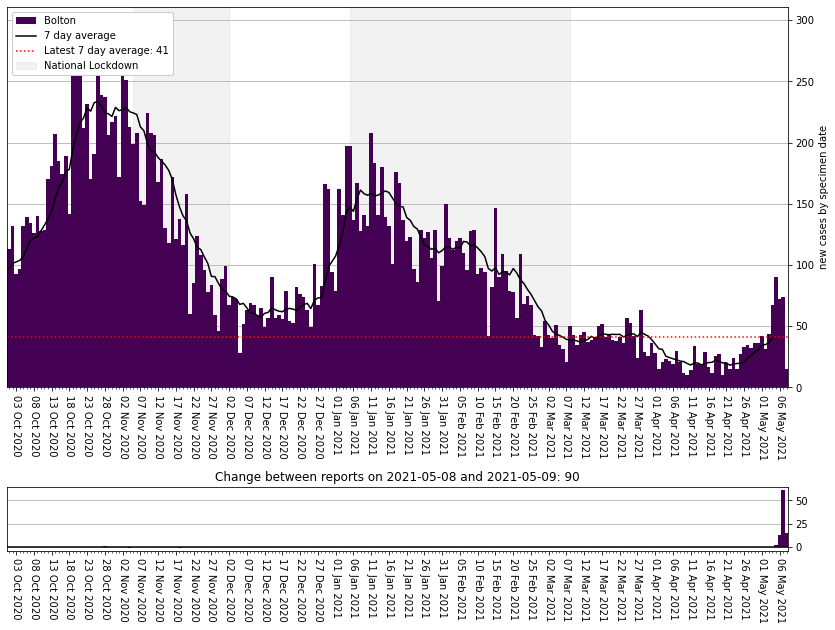

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.15

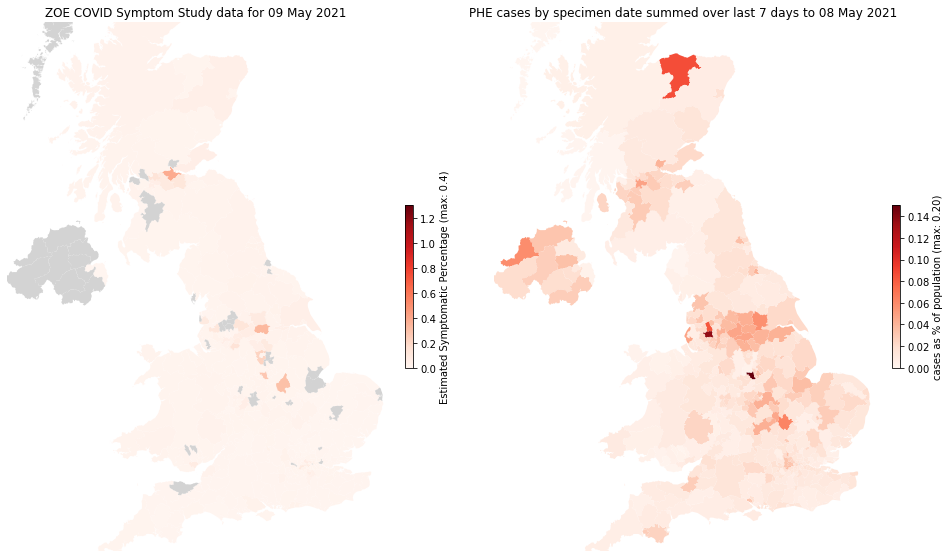

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...